# BUSA3020 - Assignment 3  

**Assignment Points**: 100    
**Assignment Weight**: 20%   
**Due Date**: Friday of Week 11 at 11:59pm   




---

## About This Assignment
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. It can be employed by all types of business, regardless of size, industry and whether they sell online or in person. For example, a small business selling guitars might decide to promote lower-priced products to younger guitarists and higher-priced premium guitars to older musicians based on segment knowledge which tells them that younger musicians have less disposable income than their older counterparts.  

<hr style="width:35%;margin-left:0;"> 

## Task
You are employed by a large supermarket chain to perform customer segmentation analysis. In particular, you are provided with a dataset on 2000 customers that has been collected through loyalty cards that customers use at checkout, and includes variables such as customer age, gender, annual income, etc. 

Your task is to analyse the data in Python using relevant techniques covered in lectures, and identify customer segments given the dataset. You will then collect your results in tables and diagrams which you will include in a report of **up to 1000 words** (not counting tables and figures). Make sure your report is informative, intuitive, and easy to understand by the management, who may not have technical expertise. 

Your report should include the following headings:

1. **Introduction** (10 marks)
    - Motivate the problem and what you are trying to achomplish in this report
2. **Exploratory Data Analysis** (20 marks)
    - Perform basic exploratory data analysis, present and comment on summary statistics, etc.
3. **Customer Segmentation** (40 marks)
    - Apply clustering analysis we covered in lectures
    - Choose an optimal number of customer segments/clusters  
    - Interpret identified clusters in terms customer profiles, e.g. there may be a cluster of university educated females living in a mid-sized city
    - Use two different clustering techniques
    - How do the clusters identified by the two techniques compare?
4. **Recommendations** (20 marks)
    - Provide some suggestions regarding marketing techniques that may be developed for different clusters of customers 
5. **Conclusion** (10 marks)
    - A brief summary of what you have done in the report

<hr style="width:35%;margin-left:0;"> 

## Submission   
You will need to submit two files:   
1. One Jupyter Notebook containing Python code used in your analysis. Make sure your code is clean and easy to understand by the markers. Include comments.  
2. One PDF document containing your report to be submitted to the management. The report should be self-contained and include all relevant tables/graphs that you generated using the submitted Jupyter notebook. You can write the report in Word, and then save it as a PDF file which will be submitted.

**Scope**

By utillising classification models like K-means and agglmoerative clustering, this report aims to create and analyse customer segments based on distinctive patterns and characteristics, enabling meticulious planning and a data-driven approach for decision-making. Such analysis may provide actionable insights on how to improve customer retention and acquisitions, create marketing strategies tailored to targeted demographics and ultimately better understand a stores consumer base. The data collected contains the following information: Sex, Marital status, Age, Education, Income, Occupation and Settlement size, where categorical variables being Education, Income, Occupation and Settlement size are dummy-variable encoded. 

**ASSIGNMENT 3 BEGIN**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.set_option("display.max_rows", None, "display.max_columns", None, "display.width", None)
df = pd.read_csv('data/data.csv')
df = df.drop(columns = ["ID"])
X = df.values


**Data Exploration**

In [2]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


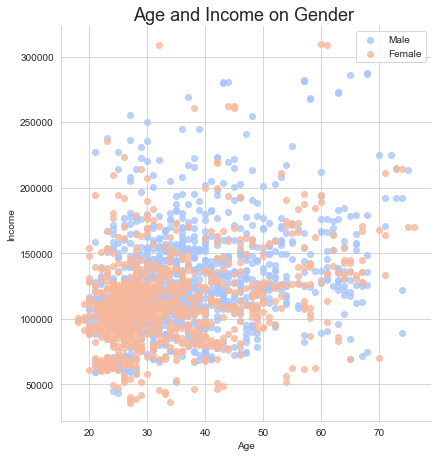

In [3]:
sns.set_style('whitegrid')
sns.lmplot('Age','Income',data=df, hue = 'Sex',
           palette='coolwarm',height=6,aspect=1,fit_reg=False, legend = False, line_kws = {"color": "red"})
plt.title('Age and Income on Gender ', fontsize = 18)
plt.legend(labels=['Male','Female'], loc = 'upper right')
plt.show()

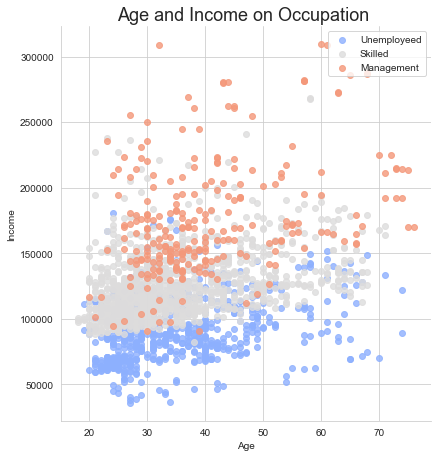

In [4]:
sns.set_style('whitegrid')
sns.lmplot('Age','Income',data=df, hue = 'Occupation',
           palette='coolwarm',height=6,aspect=1,fit_reg=False, legend = False, line_kws = {"color": "red"})
plt.title('Age and Income on Occupation ', fontsize = 18)
plt.legend(labels=['Unemployeed','Skilled','Management'], loc = 'upper right')
plt.show()

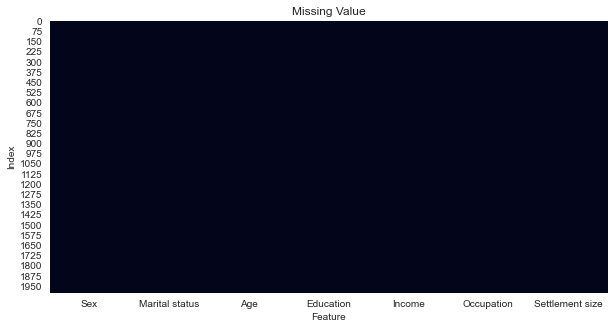

In [5]:
plt.subplots(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False)
plt.xlabel('Feature')
plt.ylabel('Index')
plt.title('Missing Value')

plt.show()

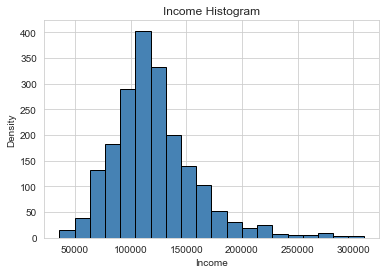

In [6]:
plt.hist(df['Income'], bins = 20, color='steelblue', edgecolor='black')
plt.title('Income Histogram')
plt.xlabel('Income')
plt.ylabel('Density')
plt.show()

Text(0.5, 1.0, 'Number of various education levels')

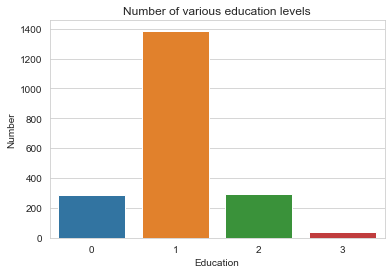

In [7]:
Educationplot = sns.countplot(df['Education'])
Educationplot.set(xlabel='Education', ylabel = 'Number')
plt.title('Number of various education levels')
#df.head()

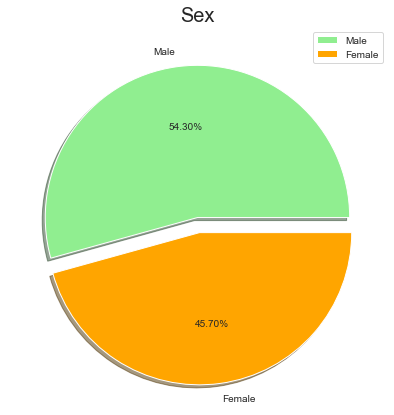

In [8]:
labels = ['Male', 'Female']
size = df['Sex'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Sex', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

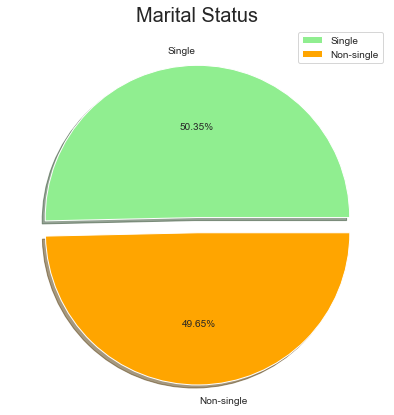

In [9]:
labels = ['Single', 'Non-single']
size = df['Marital status'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Marital Status', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

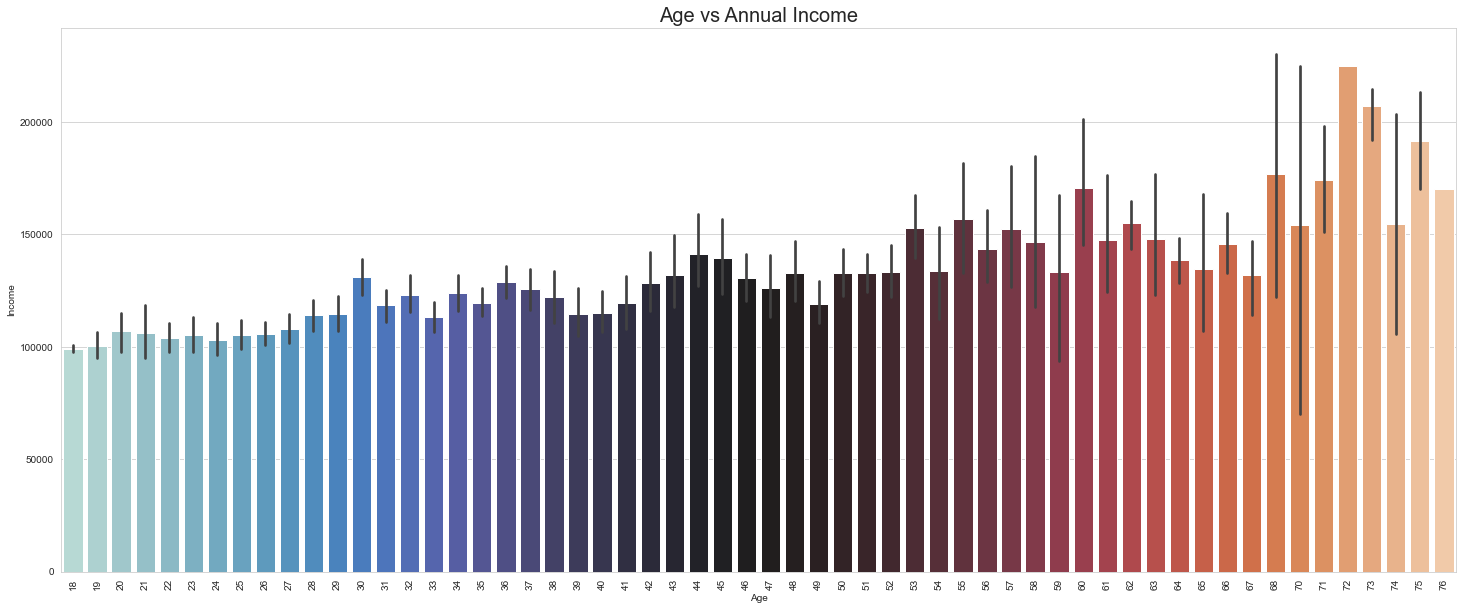

In [10]:
plt.figure(figsize=(25,10))
# Passing X axis and Y axis along with subplot position
plt.title('Age vs Annual Income', fontsize = 20)
plt.xticks(rotation=90)
sns.barplot(x = df['Age'] , y = df['Income'] , palette='icefire');

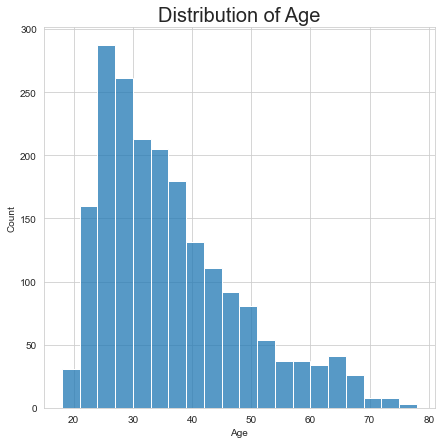

In [11]:
sns.histplot(data=df, x="Age", binwidth=3)
plt.title('Distribution of Age', fontsize = 20)
plt.show()

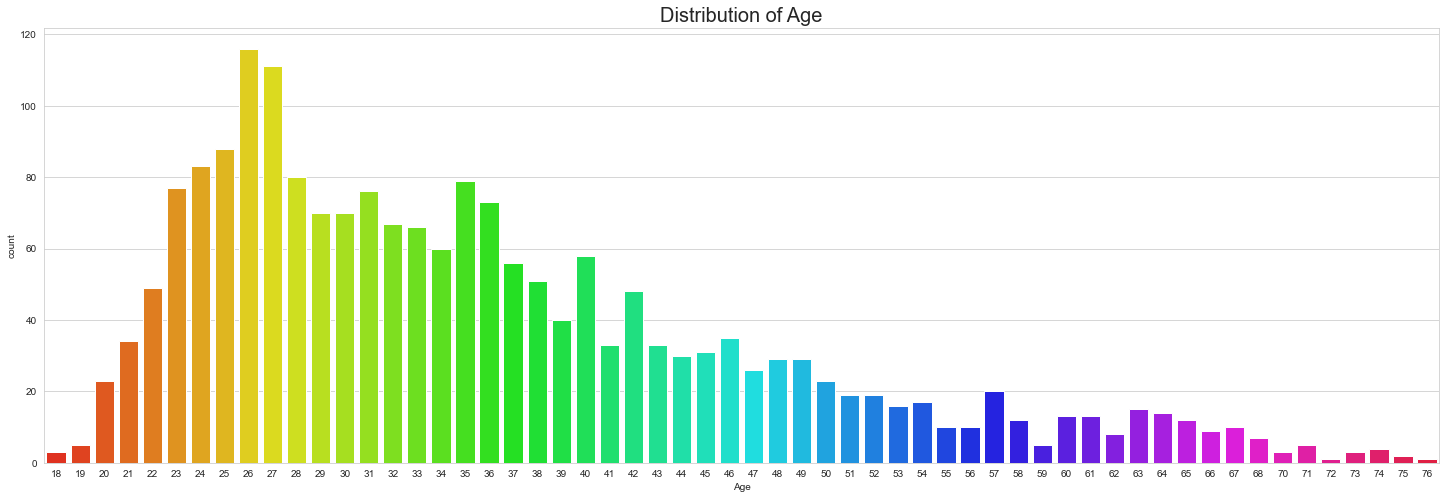

In [12]:
plt.rcParams['figure.figsize'] = (25, 8)
sns.countplot(df['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Number of various Occupation levels')

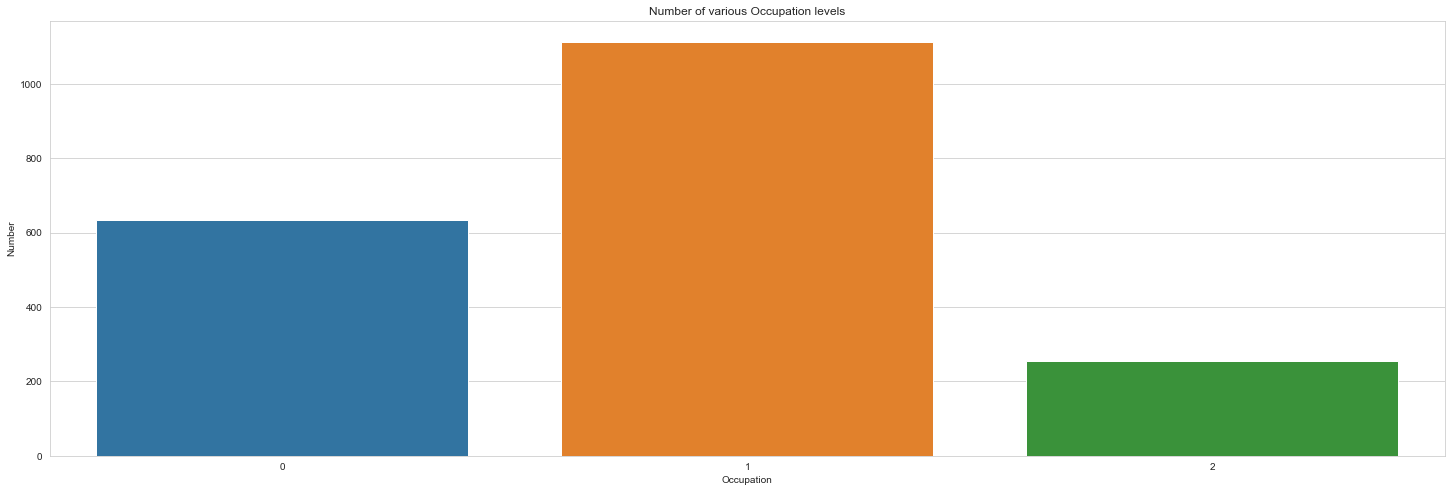

In [13]:
occupationplot = sns.countplot(df['Occupation'])
occupationplot.set(xlabel='Occupation', ylabel = 'Number')
plt.title('Number of various Occupation levels')
#df.head()

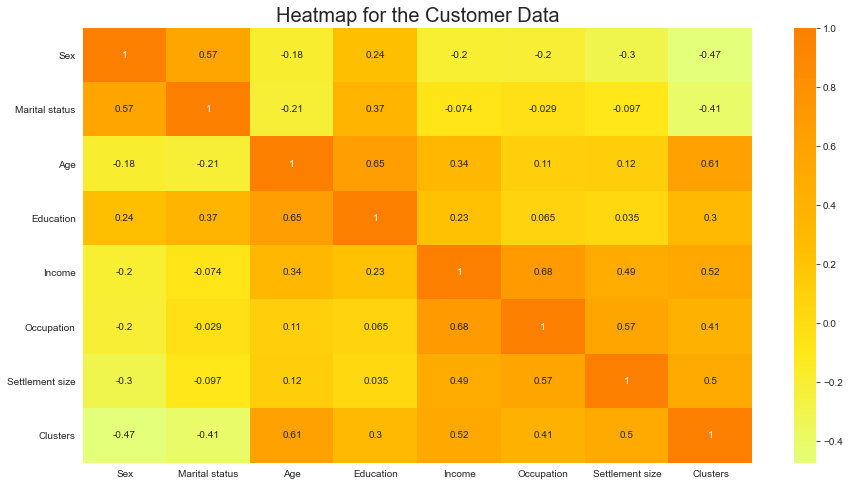

In [34]:

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Customer Data', fontsize = 20)
plt.show()

In [15]:
# Scale the features (only age and annual income is selected)
sc = StandardScaler()

sc.fit(X)
df_scaled = sc.transform(X) 

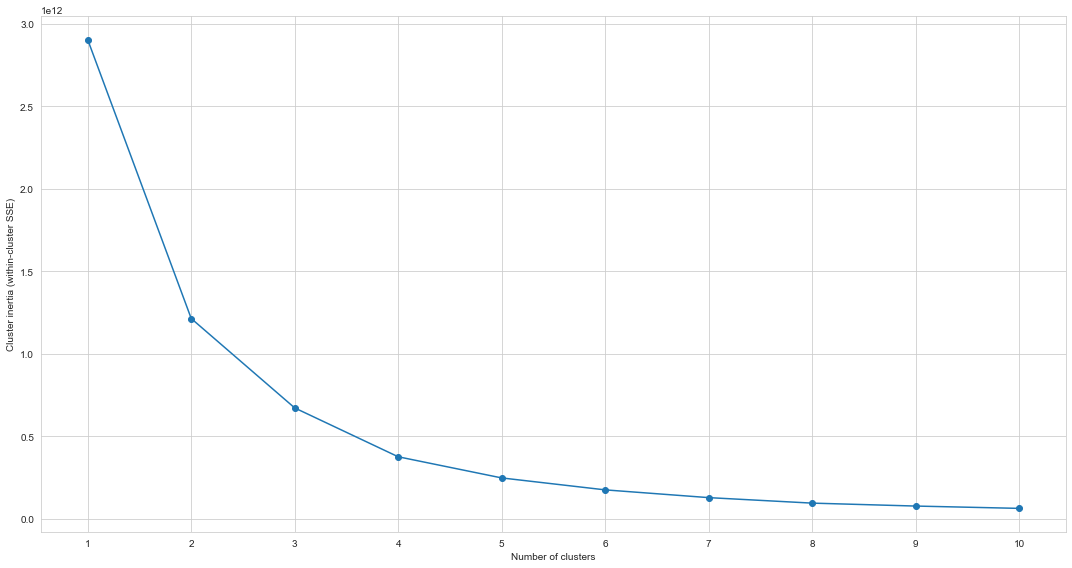

In [16]:
inertias = [] # empty list

for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(range(1,11))
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

In [33]:
# Training the K-Means clustering Model
kmeans = KMeans(init='k-means++', 
                n_clusters = 4, 
                n_init=30,
                max_iter=300,
                random_state=0)
clusters = kmeans.fit_predict(df_scaled)
df['Clusters'] = clusters + 1

Cluster_1_scaled= df.loc[df['Clusters'] == 1]
Cluster_2_scaled = df.loc[df['Clusters'] == 2]
Cluster_3_scaled = df.loc[df['Clusters'] == 3]
Cluster_4_scaled = df.loc[df['Clusters'] == 4]

Cluster_1_scaled.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.0
mean,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,1.0
std,0.353456,0.053225,6.751582,0.252071,25370.288131,0.518935,0.652831,0.0
min,0.000000,0.000000,18.000000,1.000000,35832.000000,0.000000,0.000000,1.0
25%,1.000000,1.000000,24.000000,1.000000,92304.000000,0.000000,0.000000,1.0
50%,1.000000,1.000000,27.000000,1.000000,106577.000000,1.000000,0.000000,1.0
75%,1.000000,1.000000,32.000000,1.000000,120326.000000,1.000000,1.000000,1.0
max,1.000000,1.000000,59.000000,2.000000,207262.000000,2.000000,2.000000,1.0


In [18]:
Cluster_2_scaled.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.00000,462.0
mean,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.04329,2.0
std,0.478363,0.138356,8.749180,0.517314,22950.837099,0.470361,0.20373,0.0
min,0.000000,0.000000,19.000000,0.000000,36760.000000,0.000000,0.00000,2.0
25%,0.000000,0.000000,28.000000,0.000000,79145.250000,0.000000,0.00000,2.0
50%,0.000000,0.000000,35.000000,1.000000,99102.000000,0.000000,0.00000,2.0
75%,1.000000,0.000000,41.000000,1.000000,113594.500000,1.000000,0.00000,2.0
max,1.000000,1.000000,68.000000,2.000000,171857.000000,1.000000,1.00000,2.0


In [19]:
Cluster_3_scaled.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.0
mean,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,3.0
std,0.170252,0.379170,8.501018,0.442605,33459.299686,0.486823,0.537199,0.0
min,0.000000,0.000000,20.000000,0.000000,82398.000000,0.000000,0.000000,3.0
25%,0.000000,0.000000,29.000000,0.000000,116895.750000,1.000000,1.000000,3.0
50%,0.000000,0.000000,35.000000,1.000000,135629.000000,1.000000,2.000000,3.0
75%,0.000000,0.000000,41.000000,1.000000,157468.000000,2.000000,2.000000,3.0
max,1.000000,1.000000,58.000000,1.000000,268906.000000,2.000000,2.000000,3.0


In [20]:
Cluster_4_scaled.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.0
mean,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,4.0
std,0.500950,0.462540,10.502066,0.358136,46204.670732,0.652665,0.771145,0.0
min,0.000000,0.000000,25.000000,1.000000,69487.000000,0.000000,0.000000,4.0
25%,0.000000,0.000000,47.000000,2.000000,128307.000000,1.000000,1.000000,4.0
50%,1.000000,1.000000,57.000000,2.000000,146716.000000,1.000000,1.000000,4.0
75%,1.000000,1.000000,64.000000,2.000000,172774.000000,2.000000,2.000000,4.0
max,1.000000,1.000000,76.000000,3.000000,309364.000000,2.000000,2.000000,4.0


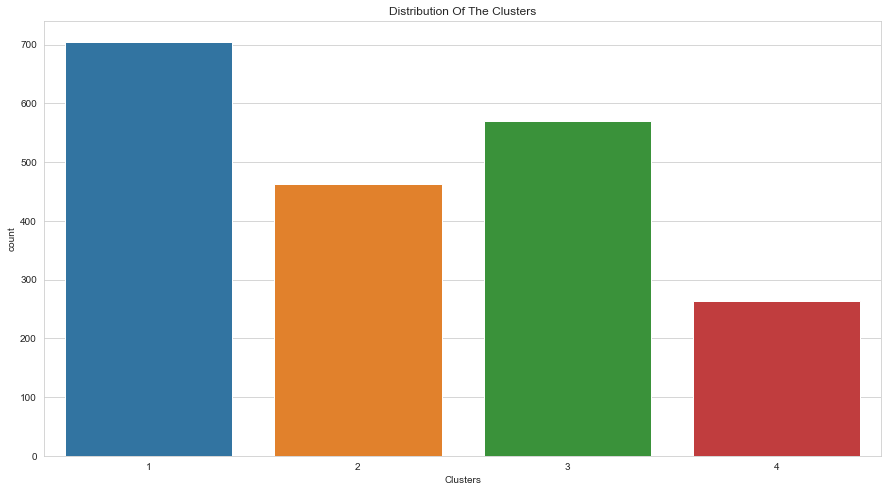

In [21]:
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

**Hiearchal Tree Cluster - Agglomerative**

In [22]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

df_AC = df.drop(columns = ["Clusters"])
X_dend = df_AC.values

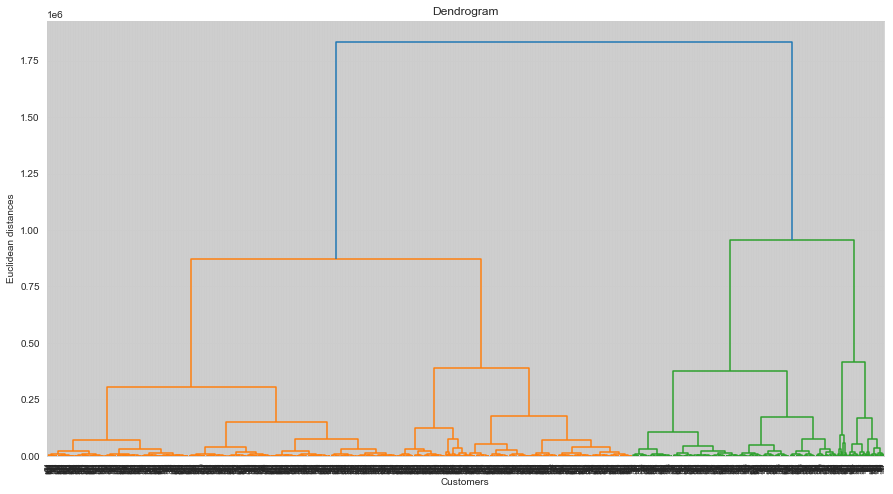

In [23]:
dendrogram = sch.dendrogram(sch.linkage(X_dend, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [24]:
AC = AgglomerativeClustering(n_clusters=4, 
                             affinity='euclidean', 
                             linkage='complete')
# fit model and predict clusters
y_pred_AC = AC.fit_predict(df_scaled)
df_AC["Clusters_AC"] = y_pred_AC+1
#Adding the Clusters feature to the orignal dataframe.
df_AC.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters_AC
0,0,0,67,2,124670,1,2,3
1,1,1,22,1,150773,1,2,1
2,0,0,49,1,89210,0,0,4
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1


In [25]:
Cluster_1_scaled_AC = df_AC.loc[df_AC['Clusters_AC'] == 1]
Cluster_2_scaled_AC = df_AC.loc[df_AC['Clusters_AC'] == 2]
Cluster_3_scaled_AC = df_AC.loc[df_AC['Clusters_AC'] == 3]
Cluster_4_scaled_AC = df_AC.loc[df_AC['Clusters_AC'] == 4]


Cluster_1_scaled_AC.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters_AC
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.0
mean,0.416122,0.438998,32.002179,0.805011,133415.004357,1.164488,1.053377,1.0
std,0.493183,0.496535,7.686751,0.478658,31421.914391,0.457772,0.773318,0.0
min,0.000000,0.000000,18.000000,0.000000,82398.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,26.000000,1.000000,109996.250000,1.000000,0.000000,1.0
50%,0.000000,0.000000,31.000000,1.000000,126133.000000,1.000000,1.000000,1.0
75%,1.000000,1.000000,36.000000,1.000000,150441.750000,1.000000,2.000000,1.0
max,1.000000,1.000000,58.000000,3.000000,268906.000000,2.000000,2.000000,1.0


In [26]:
Cluster_2_scaled_AC.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters_AC
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.0
mean,0.716049,0.808642,53.148148,2.117284,120131.697531,0.388889,0.290123,2.0
std,0.452311,0.394590,9.122508,0.322756,30185.710330,0.489010,0.494468,0.0
min,0.000000,0.000000,38.000000,2.000000,51882.000000,0.000000,0.000000,2.0
25%,0.000000,1.000000,46.000000,2.000000,98940.250000,0.000000,0.000000,2.0
50%,1.000000,1.000000,51.000000,2.000000,119497.500000,0.000000,0.000000,2.0
75%,1.000000,1.000000,61.000000,2.000000,142143.000000,1.000000,1.000000,2.0
max,1.000000,1.000000,74.000000,3.000000,190518.000000,1.000000,2.000000,2.0


In [27]:
Cluster_3_scaled_AC.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters_AC
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.0
mean,0.410256,0.564103,56.743590,2.025641,172973.314103,1.423077,1.429487,3.0
std,0.493464,0.497471,9.725836,0.225724,50456.391642,0.545225,0.643701,0.0
min,0.000000,0.000000,32.000000,1.000000,107585.000000,0.000000,0.000000,3.0
25%,0.000000,0.000000,49.000000,2.000000,133199.500000,1.000000,1.000000,3.0
50%,0.000000,1.000000,58.000000,2.000000,160265.000000,1.000000,2.000000,3.0
75%,1.000000,1.000000,64.000000,2.000000,194619.500000,2.000000,2.000000,3.0
max,1.000000,1.000000,76.000000,3.000000,309364.000000,2.000000,2.000000,3.0


In [28]:
Cluster_4_scaled_AC.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters_AC
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.0
mean,0.460733,0.485602,32.693717,0.887435,95534.937173,0.349476,0.315445,4.0
std,0.498782,0.500120,8.454514,0.316268,22838.709075,0.477117,0.660610,0.0
min,0.000000,0.000000,18.000000,0.000000,35832.000000,0.000000,0.000000,4.0
25%,0.000000,0.000000,26.000000,1.000000,78325.750000,0.000000,0.000000,4.0
50%,0.000000,0.000000,32.000000,1.000000,95199.500000,0.000000,0.000000,4.0
75%,1.000000,1.000000,39.000000,1.000000,111961.750000,1.000000,0.000000,4.0
max,1.000000,1.000000,56.000000,1.000000,167019.000000,1.000000,2.000000,4.0


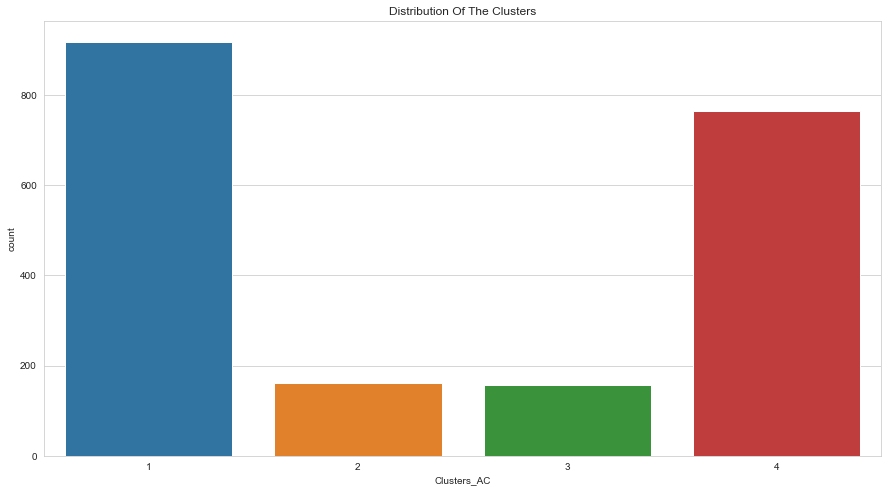

In [29]:
pl = sns.countplot(x=df_AC["Clusters_AC"])
pl.set_title("Distribution Of The Clusters")
plt.show()